In [1]:

#Comparison with TXT data

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_table(url, header=None, names=['label', 'message'])

# Convert labels to numerical
data['label_num'] = data.label.map({'ham': 0, 'spam': 1})

print(data.head())

  label                                            message  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0


In [3]:
# Step 3: Preprocess and Vectorize Text
X = data['message']
y = data['label_num']

vectorizer = TfidfVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)



In [4]:
# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.3, random_state=42)




SVM Accuracy: 0.9850
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.99      0.90      0.94       224

    accuracy                           0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.98      1672



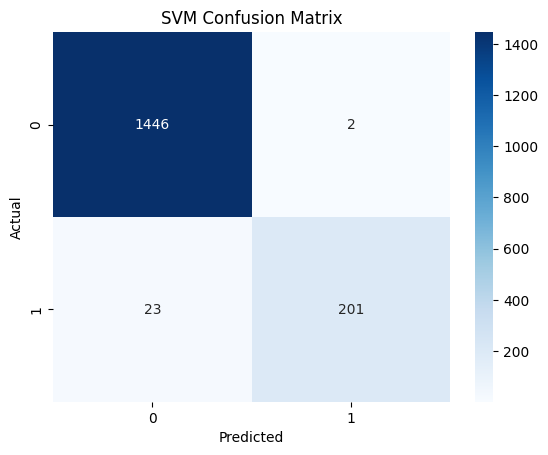


Decision Tree Accuracy: 0.9719
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1448
           1       0.92      0.87      0.89       224

    accuracy                           0.97      1672
   macro avg       0.95      0.93      0.94      1672
weighted avg       0.97      0.97      0.97      1672



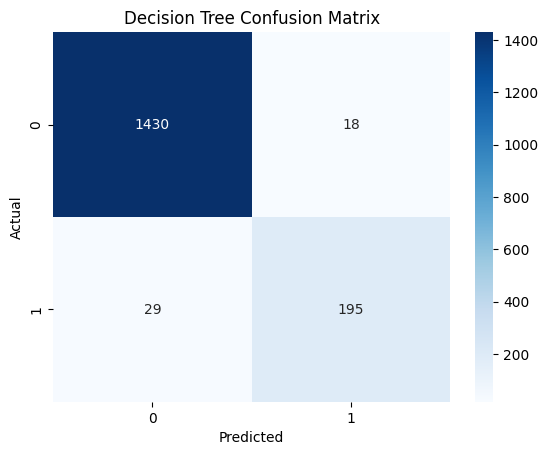


Random Forest Accuracy: 0.9803
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       1.00      0.85      0.92       224

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



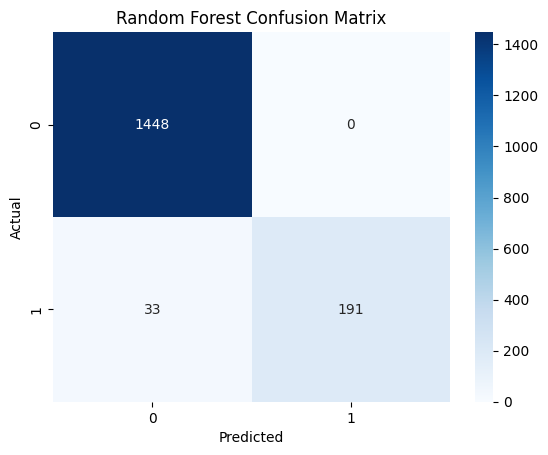

In [5]:
# Step 5: Train and Evaluate Models
models = {
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



In [6]:
# Step 6: Feature Importance from Random Forest
rf = models['Random Forest']
feature_names = vectorizer.get_feature_names_out()
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:][::-1]

print("\nTop 10 Important Features in Random Forest:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")



Top 10 Important Features in Random Forest:
claim: 0.0274
txt: 0.0264
www: 0.0242
mobile: 0.0220
free: 0.0199
uk: 0.0168
win: 0.0152
150p: 0.0145
50: 0.0130
text: 0.0127
